In [2]:
import pypsa
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd
import numpy as np

In [21]:
import warnings
from shapely.errors import ShapelyDeprecationWarning

warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
plt.rc("figure", figsize = (12,12))

In [4]:
n = pypsa.examples.ac_dc_meshed(from_master = True)
n.optimize()

INFO:pypsa.io:Imported network ac-dc-meshed.nc has buses, carriers, generators, global_constraints, lines, links, loads
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
c:\users\shnab\appdata\local\programs\python\python39\lib\site-packages\xarray\core\utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(
c:\users\shnab\appdata\local\programs\python\python39\lib\site-packages\xarray\core\utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension nam

c:\users\shnab\appdata\local\programs\python\python39\lib\site-packages\xarray\core\utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(
c:\users\shnab\appdata\local\programs\python\python39\lib\site-packages\xarray\core\utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(
c:\users\shnab\appdata\local\programs\python\python39\lib\site-packages\xarray\core\utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a map

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\shnab\AppData\Local\Temp\linopy-problem-re9ryvka.lp --output
 C:\Users\shnab\AppData\Local\Temp\linopy-solve-obnt3lid.sol
Reading problem data from 'C:\Users\shnab\AppData\Local\Temp\linopy-problem-re9ryvka.lp'...
468 rows, 188 columns, 1007 non-zeros
2678 lines were read
GLPK Simplex Optimizer 5.0
468 rows, 188 columns, 1007 non-zeros
Preprocessing...
391 rows, 187 columns, 930 non-zeros
Scaling...
 A: min|aij| =  9.693e-03  max|aij| =  1.215e+00  ratio =  1.254e+02
GM: min|aij| =  5.786e-01  max|aij| =  1.728e+00  ratio =  2.987e+00
EQ: min|aij| =  3.377e-01  max|aij| =  1.000e+00  ratio =  2.961e+00
Constructing initial basis...
Size of triangular part is 391
      0: obj =  -2.104321118e+07 inf =   9.486e+04 (101)
    162: obj =   1.210828068e+07 inf =   1.864e-11 (0) 1
*   239: obj =  -3.474256041e+06 inf =   1.755e-12 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.6 Mb 

('ok', 'optimal')

In [5]:
gen = n.generators.assign(g=n.generators_t.p.mean()).groupby(["bus", "carrier"]).g.sum()

In [28]:
n.generators_t.p.mean()

Generator
Manchester Wind    1622.00150
Manchester Gas        0.00000
Norway Wind         772.31017
Norway Gas            0.00000
Frankfurt Wind      713.92389
Frankfurt Gas       146.52740
dtype: float64

In [7]:
gen


bus         carrier
Frankfurt   gas         146.52740
            wind        713.92389
Manchester  gas           0.00000
            wind       1622.00150
Norway      gas           0.00000
            wind        772.31017
Name: g, dtype: float64

In [8]:
type(gen)

pandas.core.series.Series

c:\users\shnab\appdata\local\programs\python\python39\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


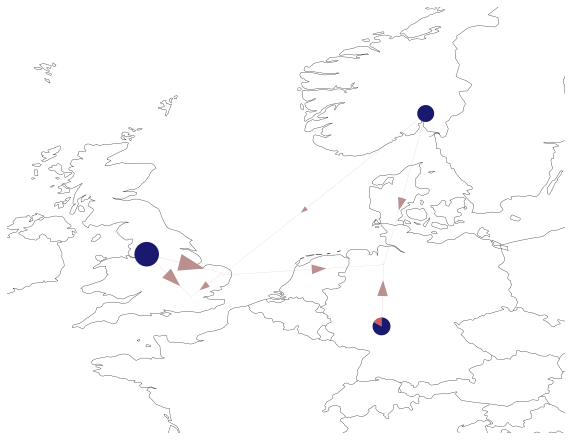

In [12]:
# links are not displayed for prettier output ('link_widths=0')
n.plot(
    bus_sizes=gen / 5e3,
    bus_colors={"gas": "indianred", "wind": "midnightblue"},
    margin=0.5,
    flow="mean",
    line_widths=0.1,
    link_widths=0,
)
plt.show()

c:\users\shnab\appdata\local\programs\python\python39\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


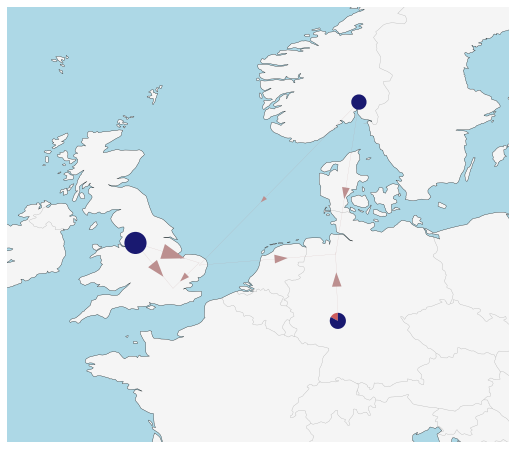

In [13]:
# links are not displayed for prettier output ('link_widths=0')
n.plot(
    bus_sizes=gen / 5e3,
    bus_colors={"gas": "indianred", "wind": "midnightblue"},
    margin=0.5,
    flow="mean",
    line_widths=0.1,
    link_widths=0,
    projection=ccrs.EqualEarth(),
    color_geomap=True,
)
plt.show()

In [15]:
d = {'a': 1, 'b': 2, 'c': 3}
ser = pd.Series(data=d)
ser


a    1
b    2
c    3
dtype: int64

In [17]:
flow = pd.Series(10, index = n.branches().index)
flow

component  name             
Link       Norwich Converter    10
           Norway Converter     10
           Bremen Converter     10
           DC link              10
Line       0                    10
           1                    10
           2                    10
           3                    10
           4                    10
           5                    10
           6                    10
dtype: int64

c:\users\shnab\appdata\local\programs\python\python39\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


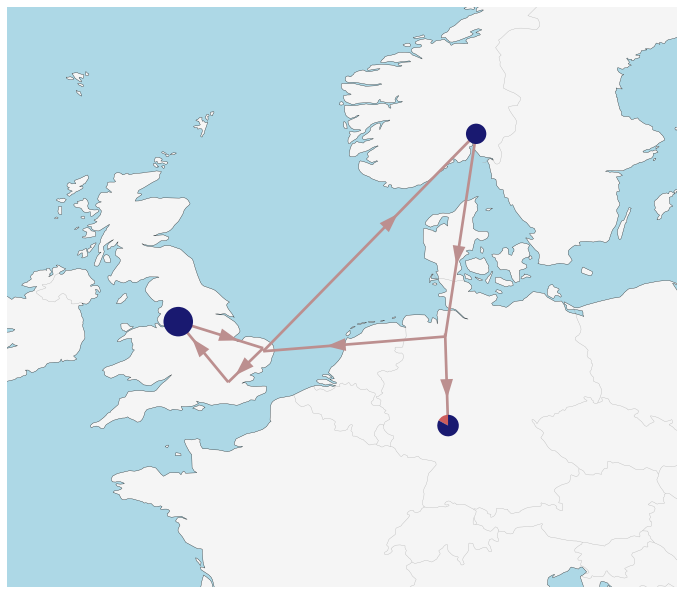

In [22]:
# links are not displayed for prettier output ('link_widths=0')
n.plot(
    bus_sizes=gen / 5e3,
    bus_colors={"gas": "indianred", "wind": "midnightblue"},
    margin=0.5,
    flow=flow,
    line_widths=2.7,
    link_widths=0,
    projection=ccrs.EqualEarth(),
    color_geomap=True,
)
plt.show()

In [25]:
# Pandas series with MultiIndex
# links are not displayed for prettier output ('link_widths=0')
collection = n.plot(
    bus_sizes=gen / 5e3,
    bus_colors={"gas": "indianred", "wind": "midnightblue"},
    margin=0.5,
    flow=flow,
    line_widths=2.7,
    link_widths=0,
    projection=ccrs.EqualEarth(),
    color_geomap=True,
    line_colors=n.lines_t.p0.mean().abs(),
)

plt.colorbar(collection[2], fraction=0.04, pad=0.004, label="Flow in MW")
plt.show()

c:\users\shnab\appdata\local\programs\python\python39\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


ValueError: Data array shape, (256,) is incompatible with alpha array shape, (7,). This can occur with the deprecated behavior of the "flat" shading option, in which a row and/or column of the data array is dropped.

<Figure size 864x864 with 2 Axes>

In [33]:
n.carriers['color'].name

'color'

In [34]:
n.carriers['color']

Carrier
gas        
wind       
battery    
Name: color, dtype: object